In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from functools import partial

import optuna
from sklearn.metrics import f1_score

In [235]:
with open('./src/train.csv') as f:
    train = pd.read_csv(f)
with open('./src/test.csv') as f:
    test = pd.read_csv(f)

In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
train.head(5)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


<Axes: xlabel='preferred_difficulty_level', ylabel='count'>

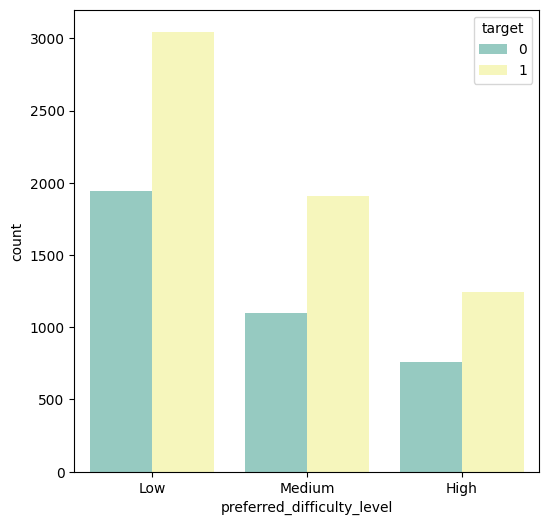

In [239]:
col = 'preferred_difficulty_level'
plt.figure(figsize = (6,6))
sns.countplot(data = train, x = col, hue = 'target', palette = 'Set3')
# plt.savefig(f'{col}.png')

In [240]:
train[train['target'] == 0].describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,3801.000000,3801.00000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.0
mean,11.953959,15.05788,15.026762,46.456986,12.502236,12.246251,75.000310,3.087609,3.870560,2.009997,3.506972,0.0
std,6.618295,8.42873,2.956732,39.639733,6.854200,3.630554,9.873574,1.755430,1.259105,1.409145,2.302291,0.0
min,1.000000,1.00000,3.636424,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.0
25%,6.000000,8.00000,13.077376,14.485582,7.000000,10.000000,68.316764,2.000000,3.000000,1.000000,1.000000,0.0
50%,12.000000,15.00000,14.979239,34.773346,13.000000,12.000000,74.981448,3.000000,4.000000,2.000000,4.000000,0.0
75%,18.000000,22.00000,17.030607,68.298309,18.000000,15.000000,81.520614,4.000000,5.000000,3.000000,6.000000,0.0
max,23.000000,29.00000,26.998490,179.176060,24.000000,27.000000,107.135153,11.000000,5.000000,10.000000,7.000000,0.0


In [241]:
train[train['target'] == 1].describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,6199.00000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.0
mean,11.86272,14.985804,14.974035,60.105533,12.571866,12.216003,75.047419,3.016616,3.895628,2.010808,3.500403,1.0
std,6.59050,8.322310,3.029275,63.477523,6.980077,3.636558,10.027058,1.754416,1.264061,1.428306,2.316925,0.0
min,1.00000,1.000000,2.366189,0.013535,1.000000,2.000000,36.115562,0.000000,1.000000,0.000000,0.000000,1.0
25%,6.00000,8.000000,12.976618,15.908562,7.000000,10.000000,68.249866,2.000000,3.000000,1.000000,1.000000,1.0
50%,12.00000,15.000000,14.979217,39.705116,12.000000,12.000000,75.199591,3.000000,4.000000,2.000000,3.000000,1.0
75%,18.00000,22.000000,16.964874,80.159683,19.000000,15.000000,81.867694,4.000000,5.000000,3.000000,6.000000,1.0
max,23.00000,29.000000,26.284396,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,8.000000,7.000000,1.0


In [242]:
train.target.astype('category', copy=False)
train = train.drop(columns='user_id')
train

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [243]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X = pd.get_dummies(X)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=39)

In [244]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
model.feature_importances_
df = pd.DataFrame({'idx': X.columns, 'imp' : model.feature_importances_})
df = df.sort_values(by = 'imp', ascending = False)
df

,idx,imp
3,average_time_per_learning_session,0.170458
6,recent_learning_achievement,0.151480
2,average_login_time,0.148989
1,recent_login_time,0.090196
0,subscription_duration,0.088751
4,monthly_active_learning_days,0.074426
5,total_completed_courses,0.068190
10,payment_pattern,0.060207
7,abandoned_learning_sessions,0.050104
9,customer_inquiry_history,0.044081


fold: 0


fold: 1
fold: 2
fold: 3
fold: 4
fold: 5
fold: 6
fold: 7
fold: 8
fold: 9


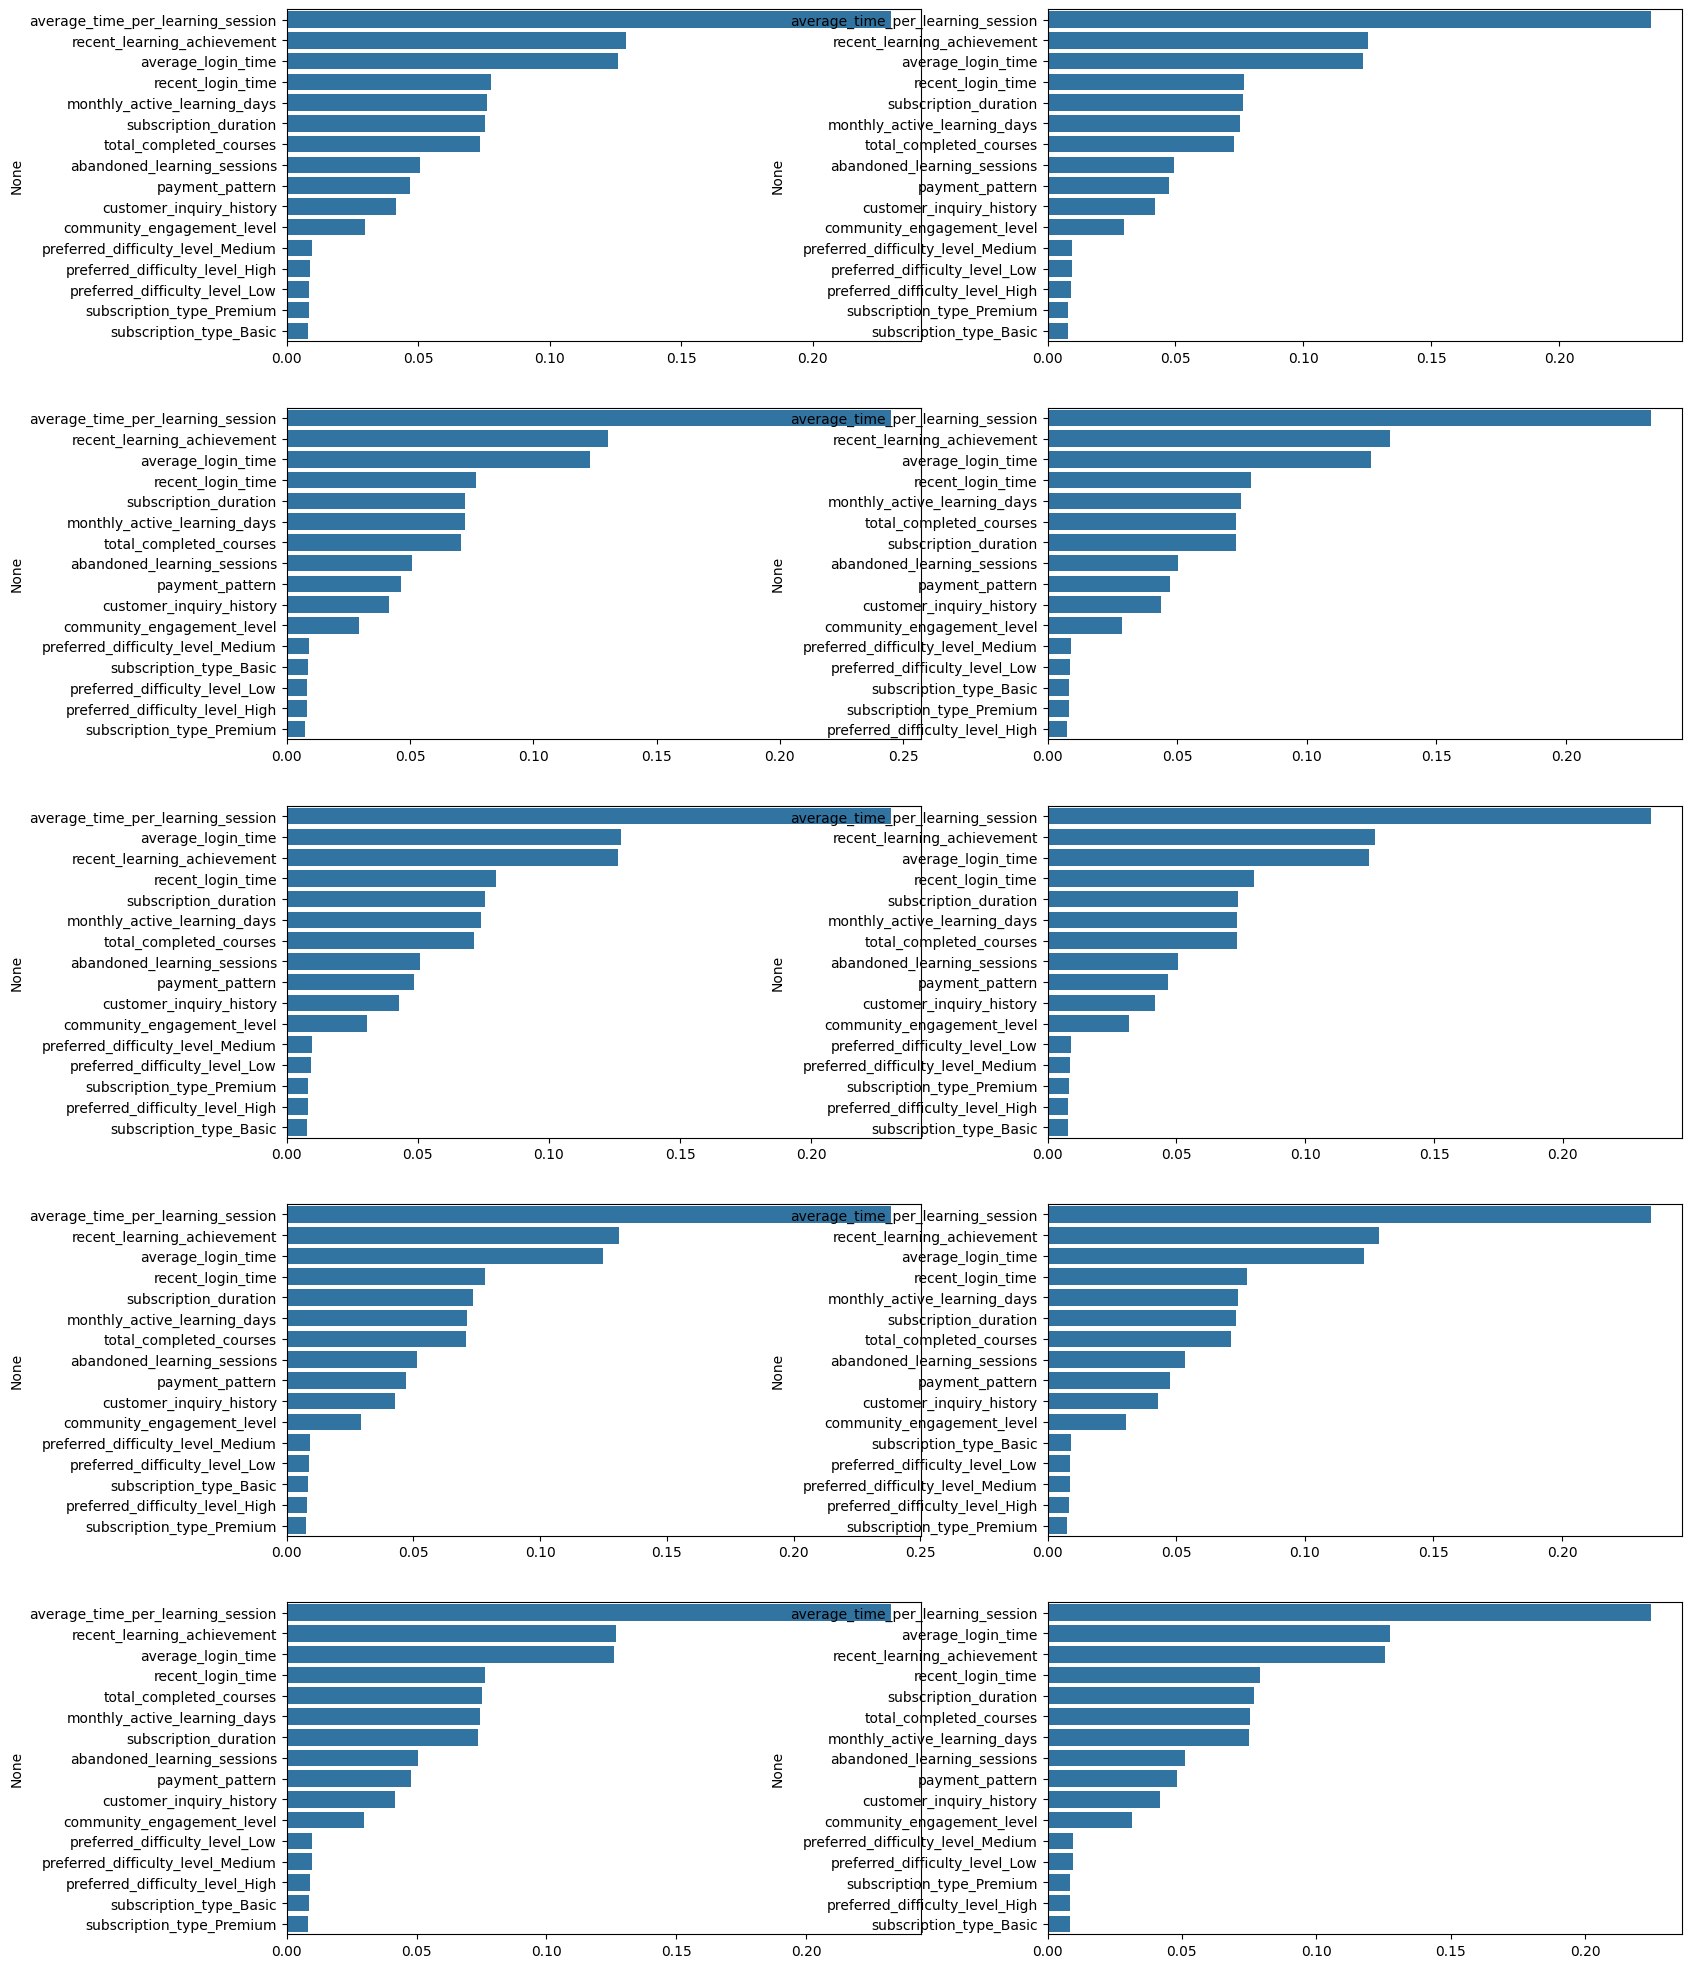

[0.3849938499384994, 0.39196303662557613, 0.38128236369174534, 0.3848002053895378, 0.3891533791783168, 0.38803310661416995, 0.3861264579496623, 0.38635227936760097, 0.37772828716201995, 0.3784959602237415]
0.384892892614087


In [245]:
kf = KFold(n_splits=10, shuffle=True, random_state=39)
macrof1 = []
model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth= 13, min_samples_split= 10, random_state= 39)
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (18,25))
for idx, (train_idx, val_idx) in enumerate(kf.split(X,y)):
    print(f"fold: {idx}")
    X_train = X.iloc[train_idx,:]
    X_val = X.iloc[val_idx,:]
    y_train = y.iloc[train_idx]
    y_val = y.iloc[val_idx]

    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    macrof1.append(f1_score(y_val, prediction, average = 'macro'))
    tmp = pd.DataFrame({'idx': X.columns, 'imp' : model.feature_importances_})
    tmp = tmp.sort_values(by = 'imp', ascending = False)
    sns.barplot(y = X_train.columns, x = model.feature_importances_, ax = ax[idx//2][idx%2], order = tmp['idx'])
plt.show()
print(macrof1)
print(np.mean(macrof1))

In [246]:
X

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,preferred_difficulty_level_High,preferred_difficulty_level_Low,preferred_difficulty_level_Medium,subscription_type_Basic,subscription_type_Premium
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,4,5,False,True,False,True,False
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,6,False,False,True,True,False
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,0,7,False,False,True,False,True
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,0,False,True,False,True,False
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,3,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,1,1,False,True,False,False,True
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,2,7,False,False,True,True,False
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,1,6,True,False,False,True,False
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,2,0,False,True,False,True,False


In [252]:
X_copy

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,recent_learning_achievement,community_engagement_level,customer_inquiry_history
0,13,14,14.946163,8.427187,18,68.360455,4,4
1,16,18,18.453224,72.646087,16,97.567322,3,1
2,22,1,16.195228,21.774492,13,94.358763,4,0
3,1,19,17.628656,42.659066,19,70.153228,3,1
4,4,5,21.390656,30.744287,19,81.917908,4,3
...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,64.966803,5,1
9996,10,11,19.374054,45.464833,9,82.750244,3,2
9997,7,27,18.240978,127.302411,24,81.567839,5,1
9998,11,7,18.783800,5.297234,10,89.885656,5,2


fold : 0
fold : 1
fold : 2
fold : 3
fold : 4
fold : 5
fold : 6
fold : 7
fold : 8
fold : 9


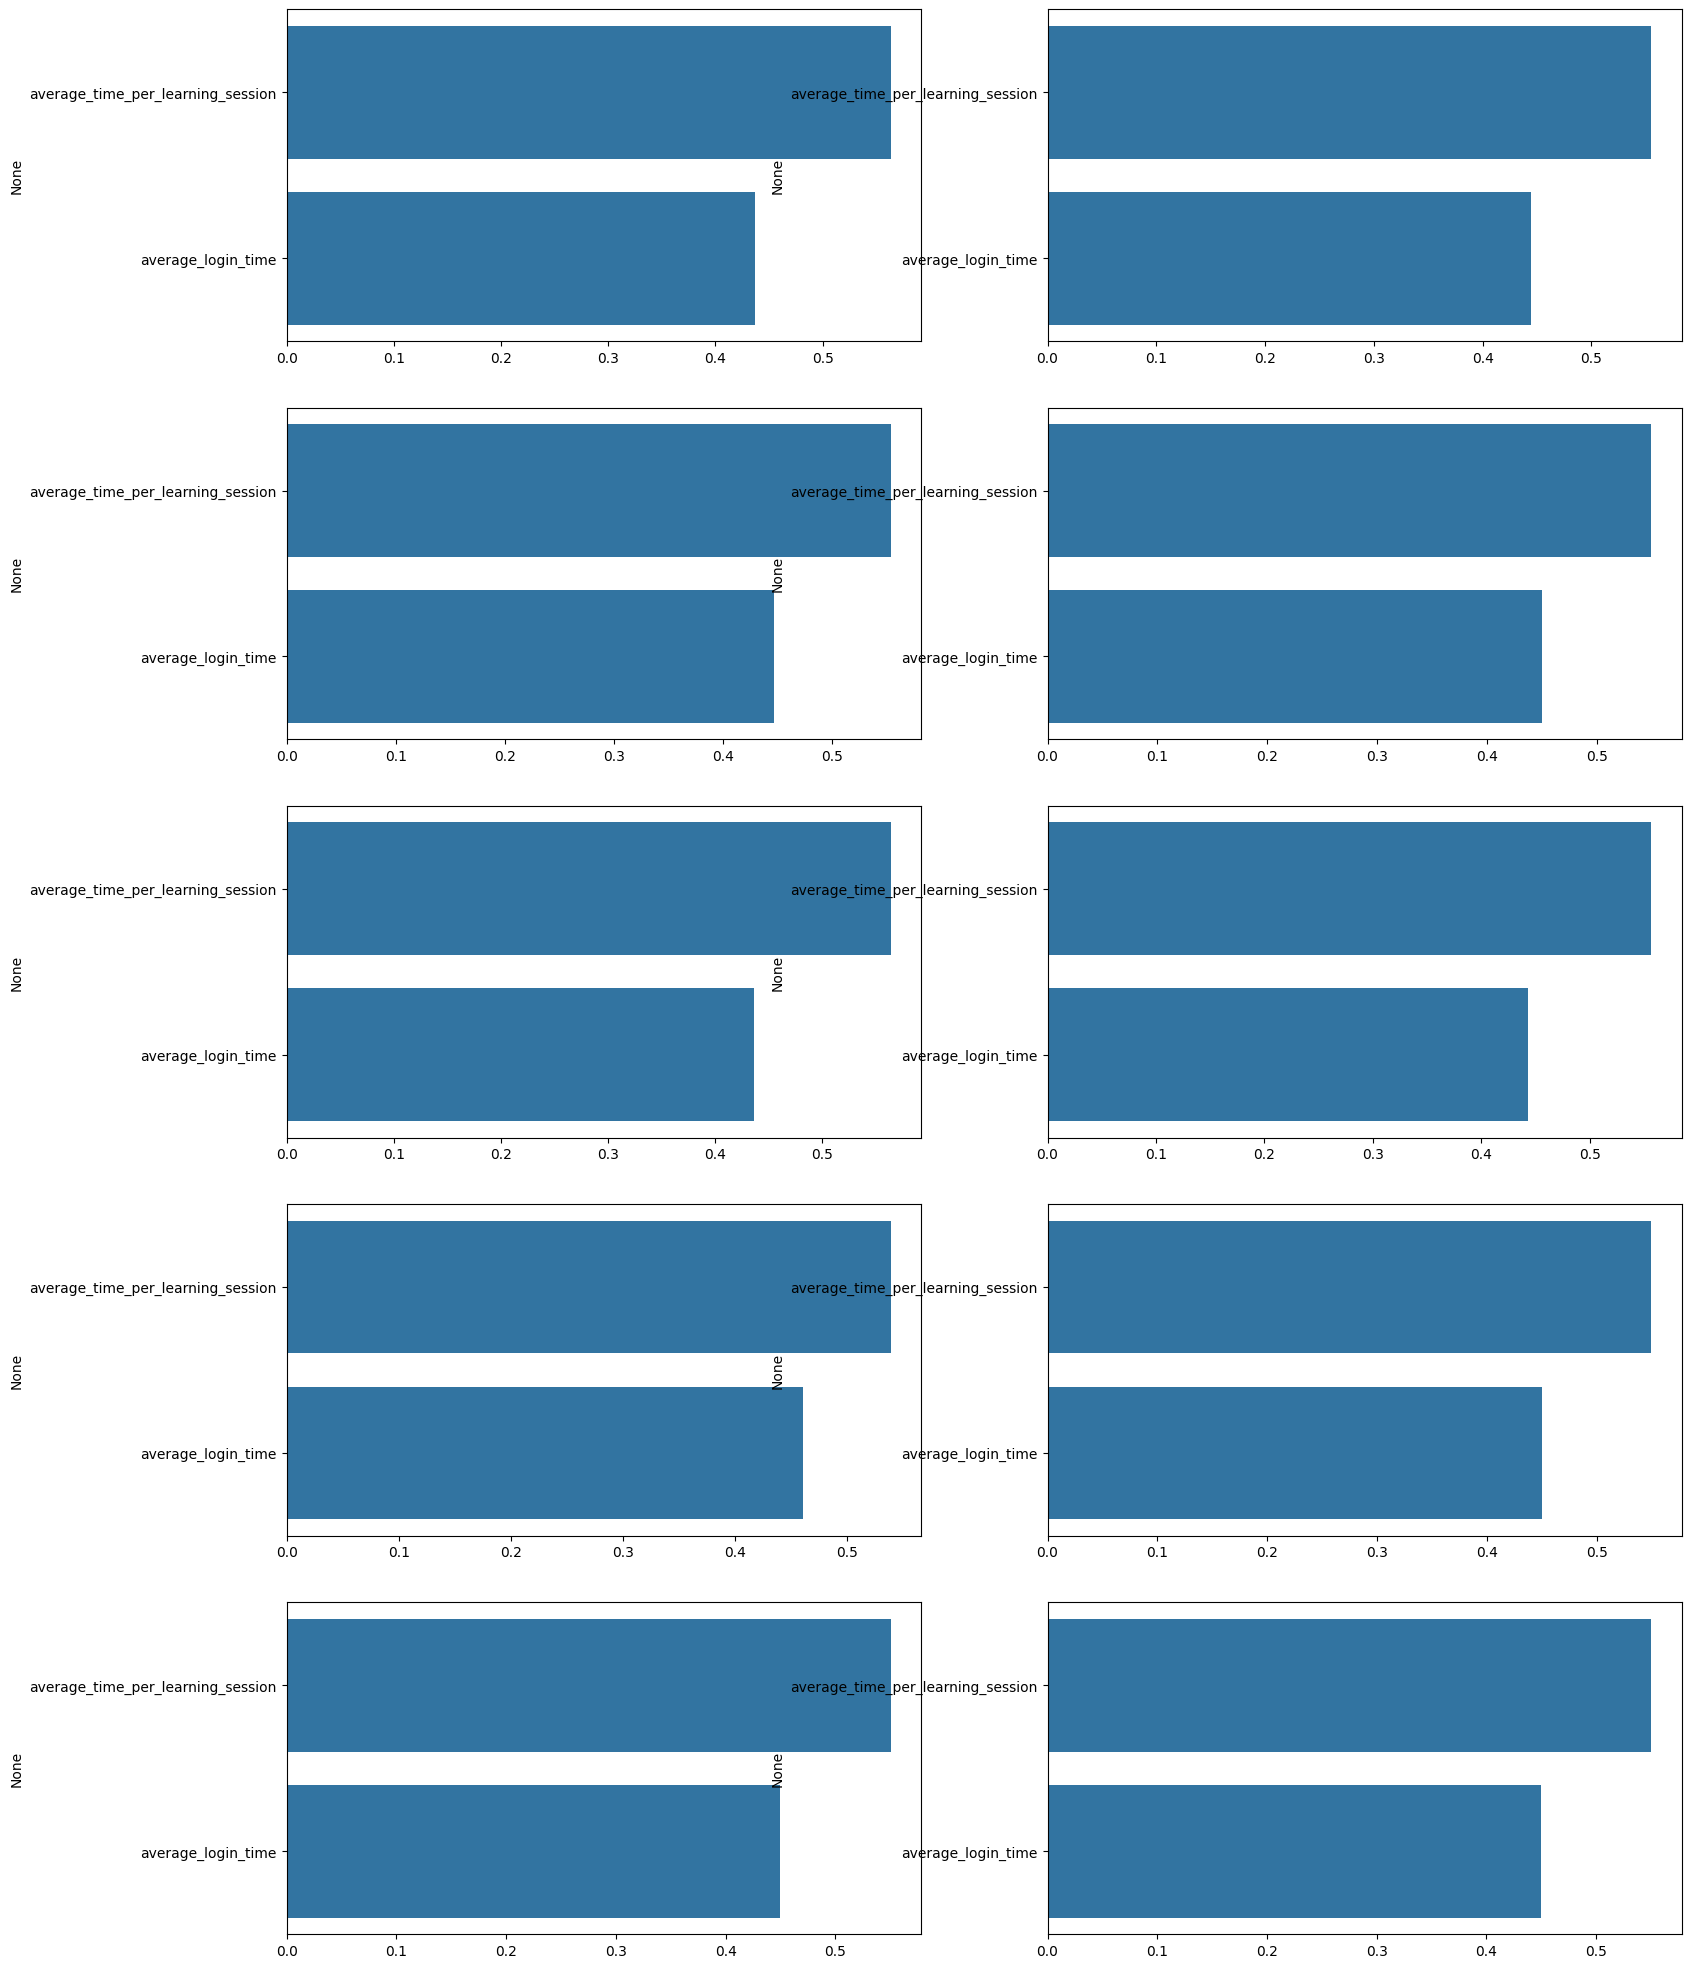

[0.49670329670329666, 0.5166283133601534, 0.5201842146022132, 0.5008834255567091, 0.49990474376071636, 0.5218868954918143, 0.5136611068462558, 0.5130991510140877, 0.5089497173201691, 0.5049375392560542]
0.509683840391147


In [256]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 200, colsample_bynode = 0.5, max_depth = 13, learning_rate = 0.3, reg_lambda = 1)
kf = KFold(n_splits=10, shuffle=True, random_state=39)
macrof1 = []
X_copy = X.copy()
# X_copy = X_copy.drop(columns = ['preferred_difficulty_level_High','preferred_difficulty_level_Low','preferred_difficulty_level_Medium','payment_pattern','total_completed_courses','abandoned_learning_sessions','subscription_type_Basic','subscription_type_Premium'])
X_copy = X_copy[['average_login_time','average_time_per_learning_session']]
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (18, 25))
for idx, (train_idx, val_idx) in enumerate(kf.split(X_copy, y)):
    print(f"fold : {idx}")
    X_train = X_copy.iloc[train_idx,:]
    X_val = X_copy.iloc[val_idx,:]
    y_train = y.iloc[train_idx]
    y_val = y.iloc[val_idx]

    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    macrof1.append(f1_score(y_val, prediction, average = 'macro'))
    tmp = pd.DataFrame({'idx': X_copy.columns, 'imp' : model.feature_importances_})
    tmp = tmp.sort_values(by = 'imp', ascending = False)
    sns.barplot(y = X_train.columns,x =  model.feature_importances_, ax = ax[idx//2][idx%2], order = tmp['idx'])
plt.show()
print(macrof1)
print(np.mean(macrof1))

In [257]:
with open('./src/sample_submission.csv') as f:
    submission = pd.read_csv(f)
pred = model.predict(pd.get_dummies(test[['average_login_time','average_time_per_learning_session']]))
submission.target = pred
submission.to_csv('./src/submission.csv', index=False)

In [ ]:
train.head(5)

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
